Timesavings issue Sunday, 27 October 2-3
=========================================


In [1]:
# Import and Init the main tools
# If for some reason you do not want to cache your data you can pass 
# 'cache_data=False' to the CachedDataLoader constructor.  

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [2]:
# Get hold of the dataframe 
sql = 'SELECT * FROM v__wcb__h__record_counts'
df = cdl.get_dataframe(sql)
df = cdl.reindex_by_timestamp(df, "ts", "1H")
# df.describe()

In [3]:
# Filter a specific time period by mask
mask = (df['ts'] >= '2019-10-26 00:00:00') & (df['ts'] <= '2019-10-28 00:00:00')
mdf = df.loc[mask]
# mdf.describe()


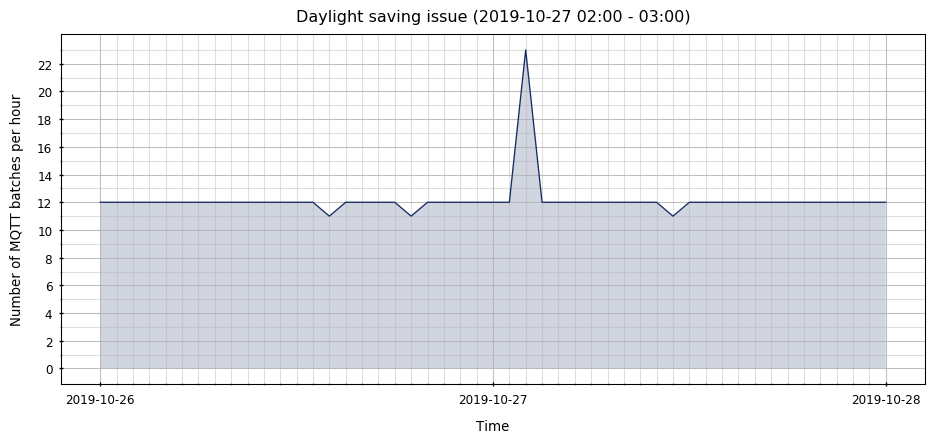

In [4]:
plotconfig = {
    "title": "Daylight saving issue (2019-10-27 02:00 - 03:00)",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["mqtt_count"],
            "x_label": "Time",
            "y_label": "Number of MQTT batches per hour",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 1,
            "y_major_ticks_freq": 2,
            "y_minor_ticks_freq": 1,
        }
    ],
    "style": {
        "palette_color": "blue",
        "x_axis_value_rotation": 0,
        "y_axis_value_rotation": 0,
        "x_axis_value_format": "%Y-%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)

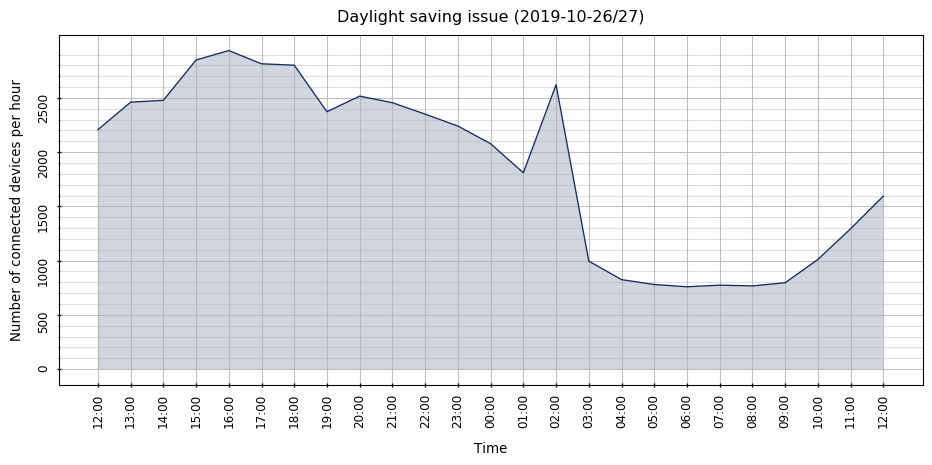

In [5]:
mask = (df['ts'] >= '2019-10-26 12:00:00') & (df['ts'] <= '2019-10-27 12:00:00')
mdf = df.loc[mask]
plotconfig = {
    "title": "Daylight saving issue (2019-10-26/27)",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["total_count"],
            "x_label": "Time",
            "y_label": "Number of connected devices per hour",
            "x_major_ticks_freq": 1,
            "x_minor_ticks_freq": 1,
            "y_major_ticks_freq": 500,
            "y_minor_ticks_freq": 100,
        }
    ],
    "style": {
        "palette_color": "blue",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%H:00",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)


In [6]:
# Show the data for the relative period
sql = "SELECT ts, mqtt_batch FROM wifi_clients " \
      "WHERE mqtt_batch >= 21535 AND mqtt_batch <= 21560 " \
      "GROUP BY mqtt_batch, ts " \
      "ORDER BY mqtt_batch;"
df = cdl.get_dataframe(sql)
print(df)

                   ts  mqtt_batch
0 2019-10-27 02:49:03       21535
1 2019-10-27 02:54:03       21540
2 2019-10-27 02:59:04       21545
3 2019-10-27 02:04:04       21550
4 2019-10-27 02:09:04       21555
5 2019-10-27 02:14:04       21560
